In [1]:
# --- Question 1: Classify Flower Species using Random Forest ---

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred = model.predict(X_test)

# Step 5: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Optional: Print example predictions
print("Actual:", y_test[:5])
print("Predicted:", y_pred[:5])


Model Accuracy: 100.00%
Actual: [1 0 2 1 1]
Predicted: [1 0 2 1 1]


In [2]:
# --- Question 2: Classify Tumors using SVM ---

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM classifier with linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred = model.predict(X_test)

# Step 5: Evaluate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(cm)


Model Accuracy: 96.49%

Confusion Matrix:
[[ 59   4]
 [  2 106]]


Saving students.csv to students (1).csv
📘 Sample of dataset:
   study_hours  attendance  marks result
0            2          55     40   Fail
1            3          60     45   Fail
2            4          70     60   Pass
3            1          30     25   Fail
4            5          85     80   Pass

✅ Model Accuracy: 100.00%
study_hours: 0.3535
attendance: 0.3636
marks: 0.2828


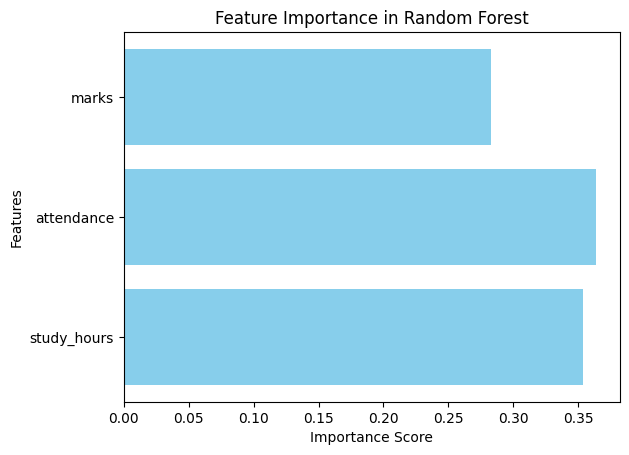

In [3]:
# --- Question 3: Random Forest on Custom CSV Dataset (Google Colab Version) ---

# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Upload your CSV file
# Click the folder icon on the left in Colab → Upload students.csv
# OR run the following code to upload directly
from google.colab import files
uploaded = files.upload()

# Step 3: Load the uploaded dataset
# Make sure your file name matches (e.g., 'students.csv')
data = pd.read_csv('students.csv')

# Show first few rows
print("📘 Sample of dataset:")
print(data.head())

# Step 4: Encode categorical data (Pass/Fail → 1/0)
le = LabelEncoder()
data['result'] = le.fit_transform(data['result'])

# Step 5: Define features (X) and target (y)
X = data[['study_hours', 'attendance', 'marks']]
y = data['result']

# Step 6: Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%")

# Step 9: Show feature importance
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

# Step 10: Optional – Plot feature importance
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


📘 Digits dataset loaded!
Number of samples: 1797
Image shape: (8, 8)

✅ Model Accuracy: 99.07%
Total misclassified samples: 5


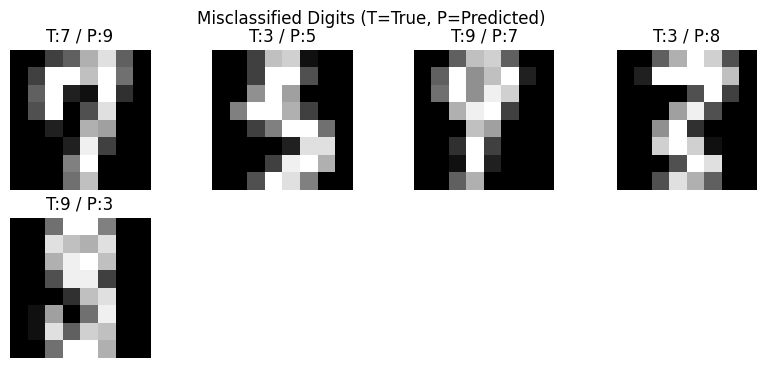

In [4]:
# --- Question 4: Handwritten Digit Recognition using SVM ---

# Step 1: Import required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Load the digits dataset
digits = datasets.load_digits()

# Show dataset info
print("📘 Digits dataset loaded!")
print("Number of samples:", len(digits.images))
print("Image shape:", digits.images[0].shape)

# Step 3: Flatten the 8x8 images into 1D feature vectors
X = digits.data
y = digits.target

# Step 4: Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train SVM classifier with RBF kernel
model = SVC(kernel='rbf', gamma=0.001, C=100)
model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test)

# Step 7: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%")

# Step 8: Visualize some misclassified samples
misclassified = X_test[y_test != y_pred]
misclassified_labels = y_pred[y_test != y_pred]
true_labels = y_test[y_test != y_pred]

print(f"Total misclassified samples: {len(misclassified)}")

# Plot first few misclassified images
if len(misclassified) > 0:
    plt.figure(figsize=(10, 4))
    for i in range(min(8, len(misclassified))):
        plt.subplot(2, 4, i + 1)
        plt.imshow(misclassified[i].reshape(8, 8), cmap='gray')
        plt.title(f"T:{true_labels[i]} / P:{misclassified_labels[i]}")
        plt.axis('off')
    plt.suptitle("Misclassified Digits (T=True, P=Predicted)")
    plt.show()
else:
    print("🎯 No misclassified samples found!")


🍷 Wine dataset loaded successfully!
Number of samples: 178
Number of features: 13

🎯 Random Forest Accuracy: 100.00%
🤖 SVM Accuracy: 66.67%

✅ Random Forest performs better on the Wine dataset.


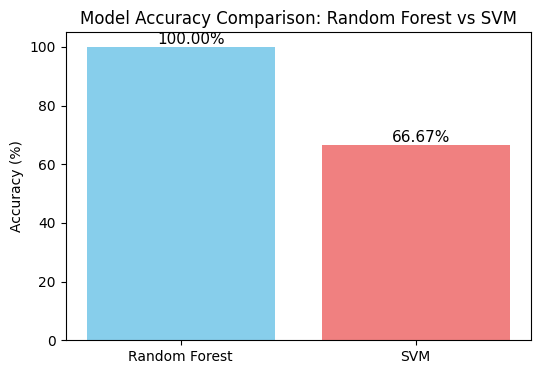

In [5]:
# --- Question 5: Compare Random Forest vs SVM on Wine Dataset (with Bar Chart) ---

# Step 1: Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

print("🍷 Wine dataset loaded successfully!")
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

# Step 3: Split into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Step 5: Train SVM Classifier (RBF Kernel)
svm_model = SVC(kernel='rbf', gamma=0.01, C=10)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Step 6: Print accuracy results
print(f"\n🎯 Random Forest Accuracy: {rf_acc * 100:.2f}%")
print(f"🤖 SVM Accuracy: {svm_acc * 100:.2f}%")

# Step 7: Compare and conclude
if rf_acc > svm_acc:
    conclusion = "✅ Random Forest performs better on the Wine dataset."
elif svm_acc > rf_acc:
    conclusion = "✅ SVM performs better on the Wine dataset."
else:
    conclusion = "✅ Both models perform equally well on the Wine dataset."

print("\n" + conclusion)

# Step 8: Visualize accuracy comparison
models = ['Random Forest', 'SVM']
accuracies = [rf_acc * 100, svm_acc * 100]

plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.ylim(0, 105)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison: Random Forest vs SVM")

# Annotate accuracy values on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 1,
             f"{bar.get_height():.2f}%", fontsize=11)

plt.show()
